# 1 - Prepare an image generation pipeline

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from diffusers import StableDiffusionPipeline

In [4]:
# pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
pipeline = StableDiffusionPipeline.from_pretrained(
    "/home/ryan/invokeai/models/.cache/59348879951894c3810e13e4d088cc2c",
    torch_dtype=torch.float16,
).to("cuda")


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [5]:
prompt = "a bouquet of tulips"

In [6]:
prompt_embeds, negative_prompt_embeds = pipeline.encode_prompt(
    prompt,
    device="cuda",
    num_images_per_prompt=1,
    do_classifier_free_guidance=True,
)

In [7]:
def generate_image(pipeline, prompt_embeds, negative_prompt_embeds, seed=0):
    with torch.no_grad():
        generator = torch.Generator().manual_seed(seed)
        return pipeline(
            prompt_embeds=prompt_embeds,
            negative_prompt_embeds=negative_prompt_embeds,
            generator=generator
        ).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

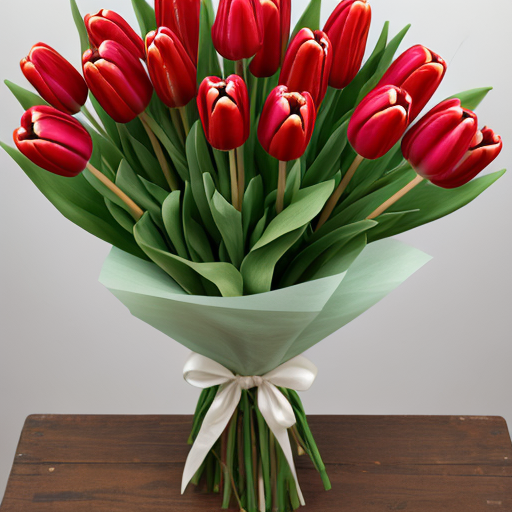

In [8]:
generate_image(pipeline, prompt_embeds, negative_prompt_embeds)

# 2 - Explore properties of prompt embeds

In [9]:
def show_prompt_embed_histogram(x, range, bins=20):
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(x, bins=bins, range=range)
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")
    ax.set_title(f"Histogram of prompt embed values. (Histogram range: {range})")
    fig.tight_layout()
    plt.show()

def plot_per_token_mean(np_prompt_embeds):
    fig, ax = plt.subplots()
    ax.plot(
        np.arange(np_prompt_embeds.shape[1]),
        np_prompt_embeds[0].mean(axis=-1),
        color='green',
        marker='o',
        linestyle='dashed',
        linewidth=2,
        markersize=12,
    )
    ax.set_xlabel("Token Embedding Index")
    ax.set_ylabel("Token Embedding Mean")
    ax.set_title("Per-Token-Embedding Means")
    fig.tight_layout()
    plt.show()

def log_prompt_embed_properties(prompt_embeds):
    print(f"Prompt embeds shape: {prompt_embeds.shape}")
    print(f"Prompt embeds range: [{prompt_embeds.min()}, {prompt_embeds.max()}]")
    print(f"Prompt embeds mean: {prompt_embeds.mean()}")

    np_prompt_embeds = prompt_embeds.detach().cpu().clone().numpy()

    show_prompt_embed_histogram(np_prompt_embeds.flatten(), [-2.0, 2.0])
    show_prompt_embed_histogram(np_prompt_embeds.flatten(), [-10.0, 10.0])
    plot_per_token_mean(np_prompt_embeds)

### Short Prompt

Prompt embeds shape: torch.Size([1, 77, 768])
Prompt embeds range: [-28.140625, 33.03125]
Prompt embeds mean: -0.110107421875


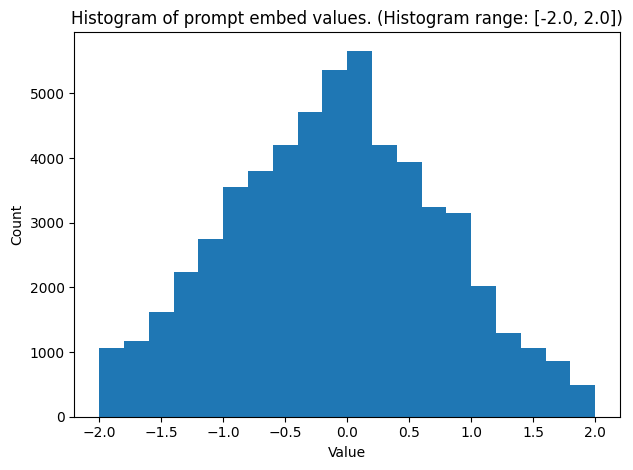

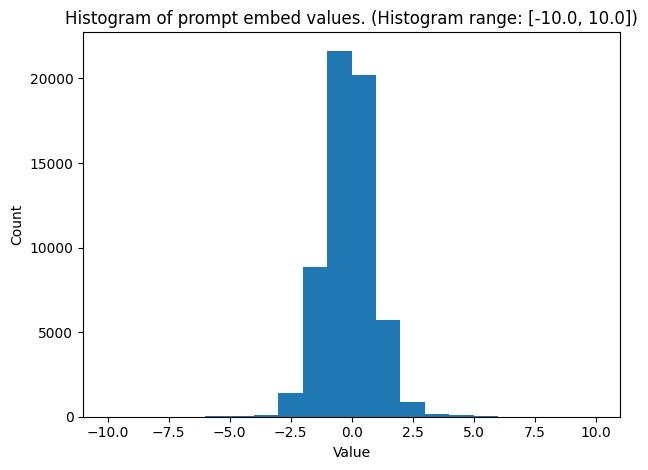

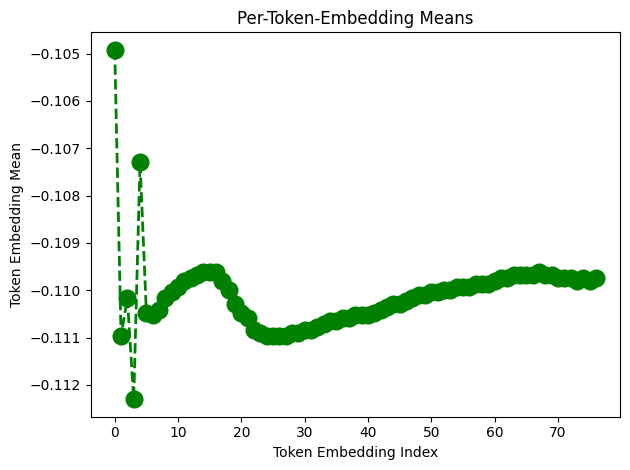

In [10]:
log_prompt_embed_properties(prompt_embeds)

### Long Prompt

In [11]:
long_prompt = f"cinematic still {prompt} . emotional, harmonious, vignette, 4k epic detailed, shot on kodak, 35mm photo, sharp focus, high budget, cinemascope, moody, epic, gorgeous, film grain, grainy"
long_prompt_embeds, long_negative_prompt_embeds = pipeline.encode_prompt(
    long_prompt,
    device="cuda",
    num_images_per_prompt=1,
    do_classifier_free_guidance=True,
)

Prompt embeds shape: torch.Size([1, 77, 768])
Prompt embeds range: [-28.140625, 33.03125]
Prompt embeds mean: -0.10858154296875


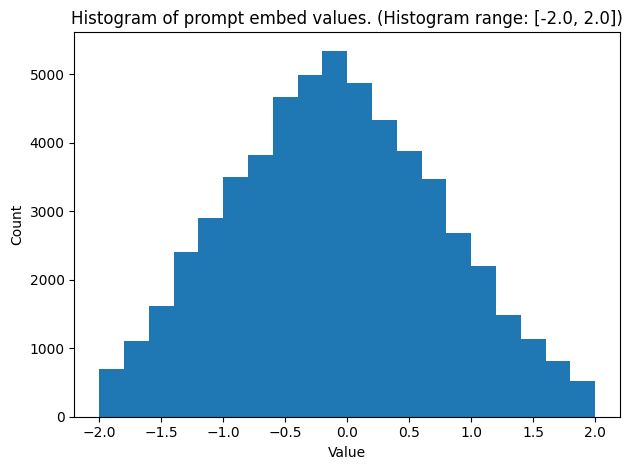

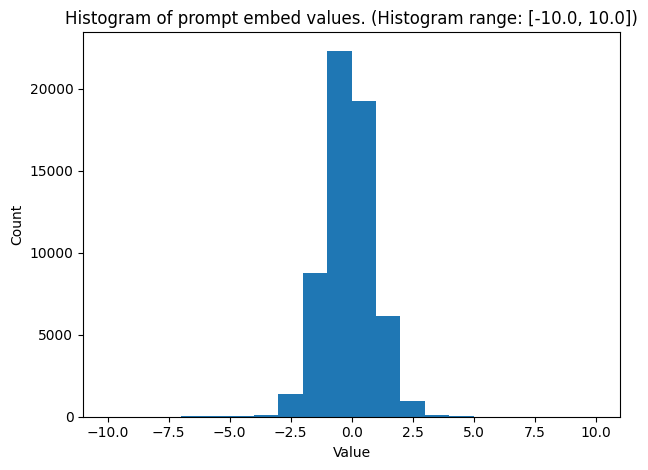

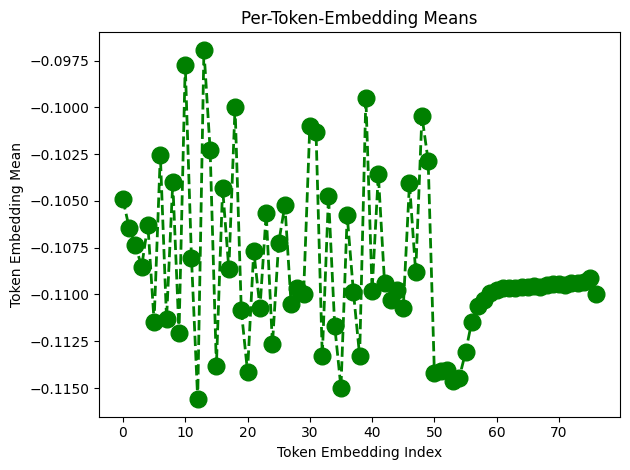

In [12]:
log_prompt_embed_properties(long_prompt_embeds)

### Negative (Empty) Prompt

Prompt embeds shape: torch.Size([1, 77, 768])
Prompt embeds range: [-28.140625, 33.03125]
Prompt embeds mean: -0.10870361328125


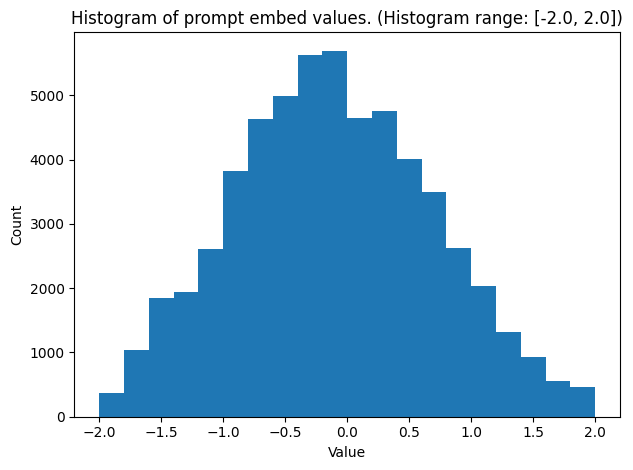

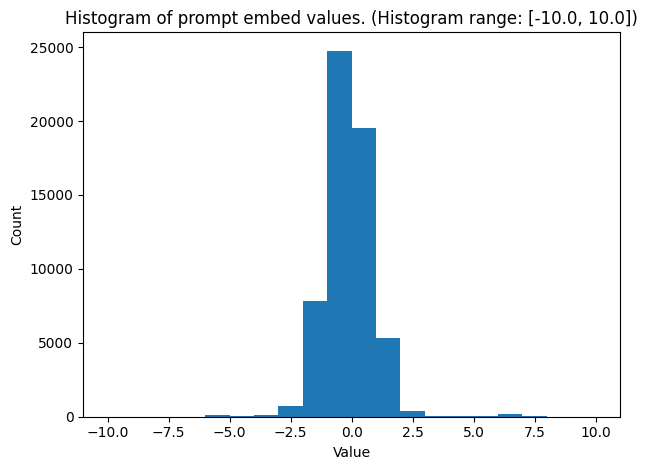

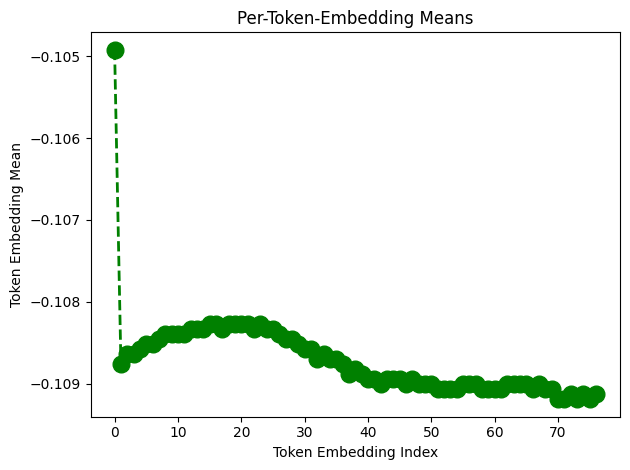

In [13]:
log_prompt_embed_properties(negative_prompt_embeds)